## Modules

In [1]:
import os
from tqdm import tqdm

import numpy as np
from scipy.signal import find_peaks, correlate, butter, sosfilt, freqs
from scipy.ndimage import gaussian_filter, median_filter
from scipy.stats import sem
from signal_analysis import SignalAnalysis

import seaborn as sns
import seaborn_image as isns
import cmcrameri.cm as cmc
from matplotlib import pyplot as plt


cmap = 'cmc.batlow'
# sns.set_palette(cmap)

## Open data

In [2]:
pathBase = r"Z:\gGermain\2024_09_12\4"

green = np.loadtxt(pathBase + "\\csv\\530_1.csv", skiprows=1, delimiter=',')[:,1]
violet = np.loadtxt(pathBase + "\\csv\\405_1.csv", skiprows=1, delimiter=',')[:,1]
blue = np.loadtxt(pathBase + "\\csv\\470_1.csv", skiprows=1, delimiter=',')[:,1]

green_t = np.load(pathBase + "\\530ts.npy")
violet_t = np.load(pathBase + "\\405ts.npy")
blue_t = np.load(pathBase + "\\470ts.npy")

## AP time series

In [12]:
FPS = 50
AP_idx = []
nChannels=5
AP_begin = 5
percycle=15
FPSc = FPS/nChannels
framespcycles = int(FPSc*percycle)
ncycles = int(len(violet_t)//framespcycles)
AP_times = np.array(list(range(ncycles)))*15+5

for ti in AP_times:
    AP_idx.append(np.argmin(np.absolute(violet_t-ti)))

# Dirac où AP dans times series
AP_series = np.zeros(len(violet_t))
AP_series[AP_idx] = 1

## Plot rapide

Text(0, 0.5, 'intensity (gray value)')

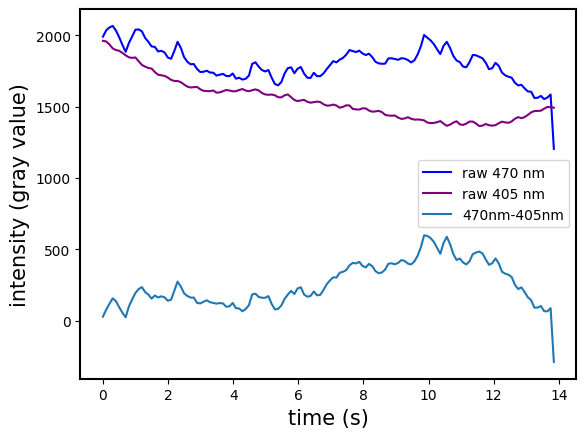

In [22]:
# plt.plot(green_t, green, 'g-')
plt.plot(blue_t, blue, 'b-', label="raw 470 nm")
plt.plot(violet_t, violet*1.16, color='purple', label="raw 405 nm")
plt.plot(blue_t, blue-violet*1.16, label="470nm-405nm")
plt.legend()
plt.xlabel("time (s)")
plt.ylabel("intensity (gray value)")

# plt.plot(blue_t, blue/np.mean(blue), 'b-')
# plt.plot(violet_t, violet/np.mean(violet)-0.1, color='purple')